In [1]:
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
with open('./data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
test_data=np.array(test_data)
test_x=test_data[:,0]
test_y=test_data[:,1]


In [4]:
with open('./data/train.pkl', 'rb') as f2:
    train_data = pickle.load(f2)

In [5]:
train_data = np.array(train_data)
np.random.default_rng().shuffle(train_data)
train_x=train_data[:,0]
train_y=train_data[:,1]
train_x=np.array(np.array_split(train_x,10))
train_y=np.array(np.array_split(train_y,10))
bias=[]
vari=[]
err=[]
ierr=[]

In [6]:
# outputs
output=[]
#loop through degrees
for degree in range(1,21):
    # loop through models
    output.append([])
    for i in range(10):
        x_train = PolynomialFeatures(degree=degree).fit_transform(train_x[i].reshape(-1,1))
        x_test = PolynomialFeatures(degree=degree).fit_transform(test_x.reshape(-1,1))
        curr_model = LinearRegression().fit(x_train,train_y[i])
        output[degree-1].append(curr_model.predict(x_test))

In [7]:
def bias_var():
    global bias
    global vari
    global err
    bias=[]
    vari=[]
    err=[]
    ierr=[]
    for degree in range(1,21):
        output_curr_degree= output[degree-1]
        output_curr_degree=np.array(output_curr_degree)
        mean_point_over_10 = np.mean(output_curr_degree, axis = 0)
        bias.append(np.mean((mean_point_over_10 - test_y)))
        var_point_over_10 = np.var(output_curr_degree, axis = 0)
        vari.append(np.mean(var_point_over_10))
        err_a= np.array(output_curr_degree)-np.array(test_y)
        err_a=np.square(err_a)
        err_mean = np.mean(err_a, axis=0)
        err.append(np.mean(err_mean))
        ierr.append(np.mean(err_mean -((mean_point_over_10 - test_y)**2)-var_point_over_10))
        
    table = pd.DataFrame({"Degree":np.array(range(1,21)),"Bias": bias,"Bias Square": np.array(bias)**2 ,"Variance": vari, "Mean Squared Error": err, "Irreducible Error": ierr})
    print(table.to_string(index=False))
    return table
        
    
    
    

In [8]:
table = bias_var()

 Degree        Bias   Bias Square       Variance  Mean Squared Error  Irreducible Error
      1  233.742469  54635.541868   31270.825536        1.035684e+06      -1.252374e-10
      2  230.179358  52982.536870   61407.756920        1.019612e+06      -8.367351e-12
      3   -9.215916     84.933104   61112.948553        6.981895e+04       2.241904e-11
      4   -2.681828      7.192200   74743.273070        8.348023e+04      -6.639311e-12
      5   -2.339067      5.471236   91963.038119        1.003603e+05      -5.115908e-12
      6   -0.372148      0.138494  105130.727056        1.128092e+05       5.911716e-13
      7    2.643573      6.988479  114520.987396        1.232503e+05       5.866241e-12
      8   -2.286653      5.228781  128788.495689        1.375288e+05      -2.728484e-13
      9    0.997462      0.994930  162170.532205        1.705712e+05       9.822543e-12
     10    2.907868      8.455698  185578.595096        1.942338e+05       2.091838e-11
     11   -1.370247      1.87757

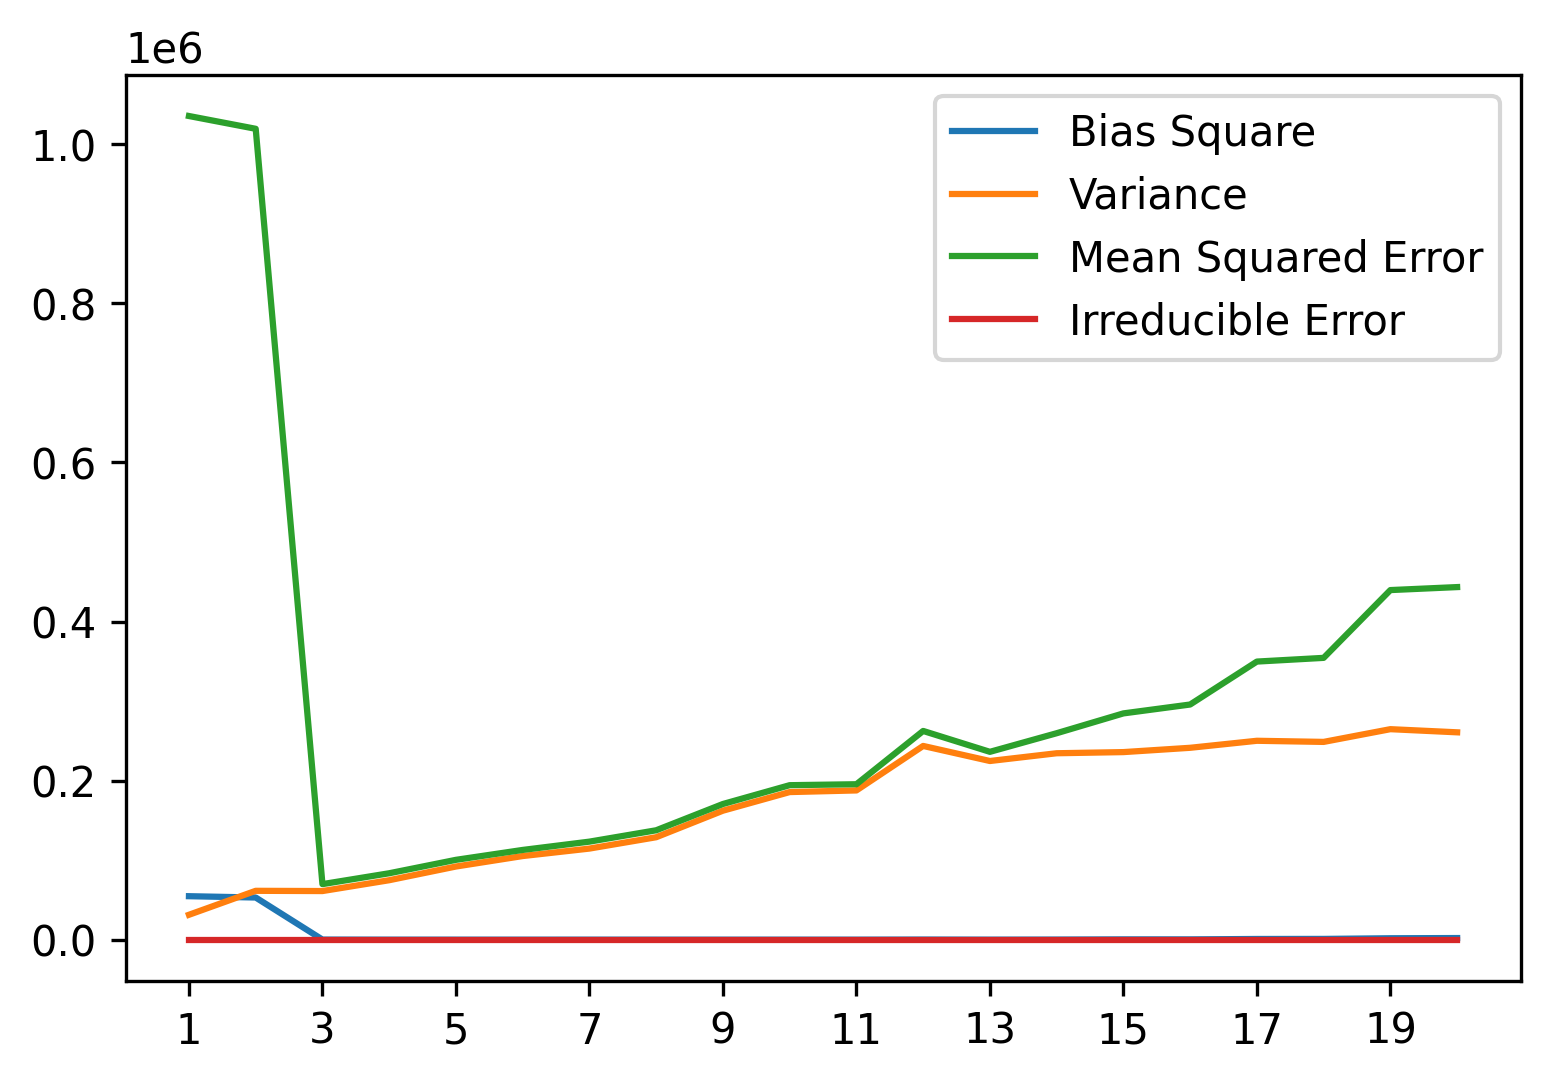

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Bias Square"].tolist(),label="Bias Square")
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.plot(np.array(range(1,21)),table["Mean Squared Error"].tolist(), label="Mean Squared Error")
plt.plot(np.array(range(1,21)),table["Irreducible Error"].tolist(), label="Irreducible Error")
plt.legend()
plt.show()